**Imports**

In [441]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

print("Using keras version " + str(keras.__version__))

Using keras version 2.4.3


**Preparing the Data**

In [383]:
grapes = np.load('Quidraw_data/G_36_grapes.npy')
ant = np.load('Quidraw_data/G_36_ant.npy')
test_images = np.load('Quidraw_data/test_images.npy')
test_labels = np.load('Quidraw_data/test_labels.npy')

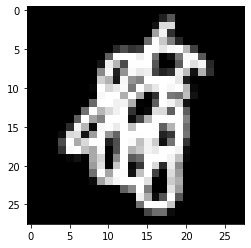

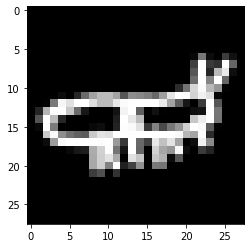

In [384]:
plt.imshow(grapes[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(ant[0].reshape(28,28), cmap='gray')
plt.show()

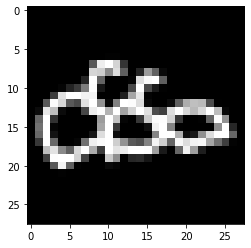

0


In [385]:
plt.imshow(test_images[100].reshape(28,28), cmap='gray')
plt.show()
print(test_labels[100])

In [386]:
train_images = np.concatenate((ant,grapes),axis=0)

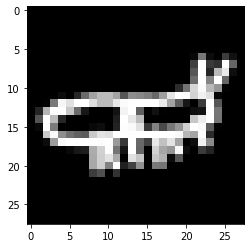

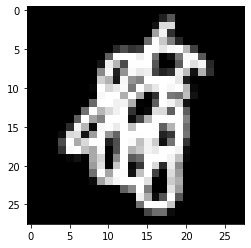

In [387]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(train_images[1000].reshape(28,28), cmap='gray')
plt.show()

In [388]:
train_labels = np.concatenate((np.zeros(1000),np.ones(1000)),axis=0)

In [389]:
scaler=MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

**Creating and Training the Baseline Model**

In [410]:
model =  Sequential()

model.add(Dense(784, input_dim=784, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [411]:
history = model.fit(x = train_images, 
                    y = train_labels, 
                    epochs=20, 
                    validation_data=(test_images,test_labels))

Epoch 1/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4345 - accuracy: 0.8170 - val_loss: 0.4114 - val_accuracy: 0.8380
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.8700 - val_loss: 0.3899 - val_accuracy: 0.8390
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.9010 - val_loss: 0.3955 - val_accuracy: 0.8300
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2006 - accuracy: 0.9325 - val_loss: 0.4056 - val_accuracy: 0.8430
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.1502 - accuracy: 0.9505 - val_loss: 0.3789 - val_accuracy: 0.8500
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0905 - accuracy: 0.9805 - val_loss: 0.4083 - val_accuracy: 0.8470
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9880 - val_loss: 0.4290 - val_accuracy: 0.8430
Epoch 8/20
63/63 [==

In [412]:
loss_df = pd.DataFrame(model.history.history)

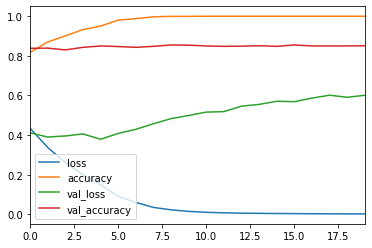

In [413]:
loss_df.plot()

We see that over 20 epochs, the loss is not improving a lot so we keep epochs = 20.

In [414]:
model.evaluate(test_images, test_labels, verbose=0)

[0.600856602191925, 0.8510000109672546]

In [415]:
model.evaluate(train_images, train_labels, verbose=0)

[0.0015944188926368952, 1.0]

In [416]:
test_predictions = model.predict(test_images)
test_predictions = pd.Series(test_predictions.reshape(1000,))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [417]:
eval_df = pd.concat([pd.Series(test_labels), test_predictions], axis=1)
eval_df.columns = ['Test True Y', 'Model Predictions']

**Model Evaluation with RMSE**

In [420]:
mean_squared_error(eval_df['Test True Y'], eval_df['Model Predictions'])**0.5

0.38600518131237566

**Creating and Training a Better Model**

In [421]:
model2 = Sequential()

model2.add(Dense(784, activation = 'relu'))

model2.add(Dense(392, activation = 'relu'))

model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics = ['accuracy'])

In [422]:
history2 = model2.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels))

Epoch 1/200
63/63 [==============================] - 0s 8ms/step - loss: 0.4492 - accuracy: 0.8040 - val_loss: 0.4035 - val_accuracy: 0.8360
Epoch 2/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3242 - accuracy: 0.8715 - val_loss: 0.3911 - val_accuracy: 0.8350
Epoch 3/200
63/63 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9170 - val_loss: 0.4089 - val_accuracy: 0.8430
Epoch 4/200
63/63 [==============================] - 0s 7ms/step - loss: 0.1189 - accuracy: 0.9595 - val_loss: 0.4612 - val_accuracy: 0.8200
Epoch 5/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0627 - accuracy: 0.9820 - val_loss: 0.5698 - val_accuracy: 0.8360
Epoch 6/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0611 - accuracy: 0.9780 - val_loss: 0.6132 - val_accuracy: 0.8390
Epoch 7/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.9452 - val_accuracy: 0.8230
Epoch 8/200
6

63/63 [==============================] - 1s 13ms/step - loss: 5.2042e-06 - accuracy: 1.0000 - val_loss: 1.2034 - val_accuracy: 0.8470
Epoch 58/200
63/63 [==============================] - 1s 15ms/step - loss: 4.8884e-06 - accuracy: 1.0000 - val_loss: 1.2104 - val_accuracy: 0.8480
Epoch 59/200
63/63 [==============================] - 1s 15ms/step - loss: 4.6006e-06 - accuracy: 1.0000 - val_loss: 1.2158 - val_accuracy: 0.8480
Epoch 60/200
63/63 [==============================] - 1s 15ms/step - loss: 4.3388e-06 - accuracy: 1.0000 - val_loss: 1.2213 - val_accuracy: 0.8470
Epoch 61/200
63/63 [==============================] - 1s 15ms/step - loss: 4.0986e-06 - accuracy: 1.0000 - val_loss: 1.2277 - val_accuracy: 0.8470
Epoch 62/200
63/63 [==============================] - 1s 12ms/step - loss: 3.8575e-06 - accuracy: 1.0000 - val_loss: 1.2326 - val_accuracy: 0.8460
Epoch 63/200
63/63 [==============================] - 1s 11ms/step - loss: 3.6428e-06 - accuracy: 1.0000 - val_loss: 1.2365 - val_a

Epoch 113/200
63/63 [==============================] - 0s 7ms/step - loss: 3.4318e-07 - accuracy: 1.0000 - val_loss: 1.4581 - val_accuracy: 0.8450
Epoch 114/200
63/63 [==============================] - 0s 7ms/step - loss: 3.2990e-07 - accuracy: 1.0000 - val_loss: 1.4629 - val_accuracy: 0.8450
Epoch 115/200
63/63 [==============================] - 0s 7ms/step - loss: 3.1713e-07 - accuracy: 1.0000 - val_loss: 1.4671 - val_accuracy: 0.8450
Epoch 116/200
63/63 [==============================] - 0s 7ms/step - loss: 3.0513e-07 - accuracy: 1.0000 - val_loss: 1.4702 - val_accuracy: 0.8450
Epoch 117/200
63/63 [==============================] - 0s 7ms/step - loss: 2.9384e-07 - accuracy: 1.0000 - val_loss: 1.4735 - val_accuracy: 0.8450
Epoch 118/200
63/63 [==============================] - 0s 7ms/step - loss: 2.8262e-07 - accuracy: 1.0000 - val_loss: 1.4770 - val_accuracy: 0.8450
Epoch 119/200
63/63 [==============================] - 0s 7ms/step - loss: 2.7183e-07 - accuracy: 1.0000 - val_loss: 1

63/63 [==============================] - 1s 12ms/step - loss: 4.8689e-08 - accuracy: 1.0000 - val_loss: 1.6420 - val_accuracy: 0.8460
Epoch 169/200
63/63 [==============================] - 1s 17ms/step - loss: 4.7080e-08 - accuracy: 1.0000 - val_loss: 1.6447 - val_accuracy: 0.8460
Epoch 170/200
63/63 [==============================] - 1s 9ms/step - loss: 4.5579e-08 - accuracy: 1.0000 - val_loss: 1.6483 - val_accuracy: 0.8460
Epoch 171/200
63/63 [==============================] - 1s 9ms/step - loss: 4.4050e-08 - accuracy: 1.0000 - val_loss: 1.6513 - val_accuracy: 0.8460
Epoch 172/200
63/63 [==============================] - 1s 10ms/step - loss: 4.2721e-08 - accuracy: 1.0000 - val_loss: 1.6533 - val_accuracy: 0.8460
Epoch 173/200
63/63 [==============================] - 1s 13ms/step - loss: 4.1377e-08 - accuracy: 1.0000 - val_loss: 1.6563 - val_accuracy: 0.8460
Epoch 174/200
63/63 [==============================] - 1s 8ms/step - loss: 4.0087e-08 - accuracy: 1.0000 - val_loss: 1.6588 - va

In [424]:
loss_df2 = pd.DataFrame(model2.history.history)

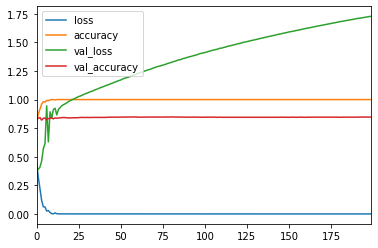

In [425]:
loss_df2.plot()

**Dealing with Overfitting and Evaluation**

In [426]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode = 'min', 
                           verbose = 1, 
                           patience = 25)

In [427]:
model3 = Sequential()

model3.add(Dense(784, activation = 'relu'))

model3.add(Dense(392, activation = 'relu'))

model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics = ['accuracy'])

In [428]:
history3 = model3.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels),
           callbacks = [early_stop])

Epoch 1/200
63/63 [==============================] - 0s 8ms/step - loss: 0.4330 - accuracy: 0.8075 - val_loss: 0.4125 - val_accuracy: 0.8340
Epoch 2/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3064 - accuracy: 0.8840 - val_loss: 0.3959 - val_accuracy: 0.8490
Epoch 3/200
63/63 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9160 - val_loss: 0.4903 - val_accuracy: 0.8210
Epoch 4/200
63/63 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.9570 - val_loss: 0.4167 - val_accuracy: 0.8470
Epoch 5/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0813 - accuracy: 0.9680 - val_loss: 0.4975 - val_accuracy: 0.8290
Epoch 6/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.5971 - val_accuracy: 0.8480
Epoch 7/200
63/63 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9935 - val_loss: 0.6419 - val_accuracy: 0.8400
Epoch 8/200
6

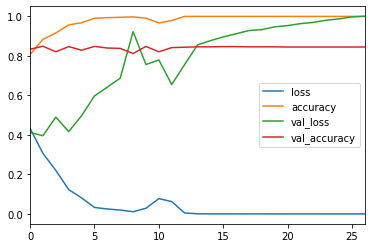

In [430]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.plot()

**Adding a Dropout Layer**

In [431]:
model4 = Sequential()

model4.add(Dense(784, activation = 'relu'))
model4.add(Dropout(0.5))

model4.add(Dense(392, activation = 'relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics = ['accuracy'])

In [432]:
history4 = model4.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels),
           callbacks = [early_stop])

Epoch 1/200
63/63 [==============================] - 1s 16ms/step - loss: 0.4896 - accuracy: 0.7955 - val_loss: 0.4106 - val_accuracy: 0.8370
Epoch 2/200
63/63 [==============================] - 1s 14ms/step - loss: 0.4070 - accuracy: 0.8305 - val_loss: 0.4126 - val_accuracy: 0.8380
Epoch 3/200
63/63 [==============================] - 1s 14ms/step - loss: 0.3693 - accuracy: 0.8445 - val_loss: 0.4294 - val_accuracy: 0.8330
Epoch 4/200
63/63 [==============================] - 1s 13ms/step - loss: 0.3409 - accuracy: 0.8600 - val_loss: 0.4144 - val_accuracy: 0.8330
Epoch 5/200
63/63 [==============================] - 1s 13ms/step - loss: 0.2849 - accuracy: 0.8910 - val_loss: 0.3852 - val_accuracy: 0.8410
Epoch 6/200
63/63 [==============================] - 1s 12ms/step - loss: 0.2545 - accuracy: 0.9035 - val_loss: 0.4258 - val_accuracy: 0.8330
Epoch 7/200
63/63 [==============================] - 1s 13ms/step - loss: 0.2238 - accuracy: 0.9125 - val_loss: 0.4230 - val_accuracy: 0.8360
Epoch 

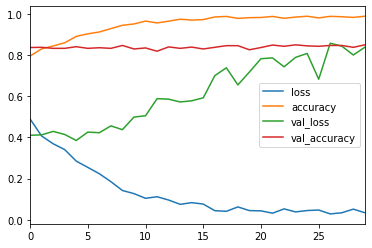

In [434]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.plot()

In [437]:
test_predictions4 = model.predict(test_images)
test_predictions4 = pd.Series(test_predictions4.reshape(1000,))
test_predictions4 = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [438]:
eval_df4 = pd.concat([pred_df, test_predictions4], axis=1)
eval_df4.columns = ['Test True Y', 'Model 4 Predictions']

In [439]:
mean_squared_error(eval_df4['Test True Y'], eval_df4['Model 4 Predictions'])**0.5

0.38600518131237566

**Resulst are not better than the baseline model so get back to our baseline model using the dropout and the early stop techniques**

In [442]:
print(classification_report(test_labels, test_predictions4))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       500
           1       0.84      0.87      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [443]:
print(confusion_matrix(test_labels, test_predictions4))

[[416  84]
 [ 65 435]]


**Final Model**

In [472]:
model5 =  Sequential()

model5.add(Dense(784, input_dim=784, activation = "relu"))
model5.add(Dropout(0.5))

model5.add(Dense(1, activation = "sigmoid"))

model5.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [473]:
history5 = model5.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels),
           callbacks = [early_stop])

Epoch 1/200
63/63 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.8005 - val_loss: 0.4230 - val_accuracy: 0.8330
Epoch 2/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3892 - accuracy: 0.8460 - val_loss: 0.4070 - val_accuracy: 0.8330
Epoch 3/200
63/63 [==============================] - 0s 6ms/step - loss: 0.3271 - accuracy: 0.8710 - val_loss: 0.4261 - val_accuracy: 0.8300
Epoch 4/200
63/63 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.8820 - val_loss: 0.4153 - val_accuracy: 0.8280
Epoch 5/200
63/63 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.9035 - val_loss: 0.3883 - val_accuracy: 0.8410
Epoch 6/200
63/63 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.9180 - val_loss: 0.4099 - val_accuracy: 0.8360
Epoch 7/200
63/63 [==============================] - 0s 5ms/step - loss: 0.1988 - accuracy: 0.9325 - val_loss: 0.4196 - val_accuracy: 0.8420
Epoch 8/200
6

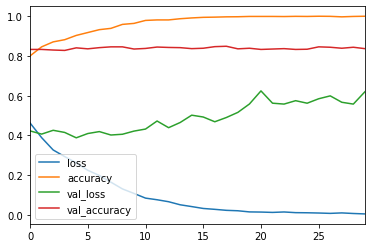

In [474]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.plot()

In [475]:
test_predictions5 = model.predict(test_images)
test_predictions5 = pd.Series(test_predictions5.reshape(1000,))
test_predictions5 = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [476]:
eval_df5 = pd.concat([pred_df, test_predictions5], axis=1)
eval_df5.columns = ['Test True Y', 'Model 5 Predictions']

In [477]:
eval_df5

,Test True Y,Model 5 Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0


In [478]:
mean_squared_error(eval_df5['Test True Y'], eval_df5['Model 5 Predictions'])**0.5

0.38600518131237566

In [470]:
print(classification_report(test_labels, test_predictions5))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       500
           1       0.84      0.87      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

